In [1]:
from typing import cast
import tensorflow as tf
import keras
import retina
import pandas as pd
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv(retina.filesys.DATA_CSV_PATH, index_col=False)
labels = df["label"]
df = df.drop(columns=["label"])
labels

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
408    5.0
409    5.0
410    5.0
411    5.0
412    5.0
Name: label, Length: 413, dtype: float64

In [22]:
dataset = tf.data.Dataset.from_tensor_slices((df, labels))
train_dataset, test_dataset = keras.utils.split_dataset(dataset, shuffle=True, seed=42, left_size=0.7)
train_dataset, validation_dataset = keras.utils.split_dataset(train_dataset, shuffle=True, seed=42, left_size=0.7)

train_dataset = train_dataset.batch(64)
test_dataset = test_dataset.batch(64)
validation_dataset = validation_dataset.batch(64)

dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(119,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>

In [23]:
model = keras.Sequential([
  keras.layers.Input(shape=dataset.element_spec[0].shape),
  keras.layers.Dense(100, activation="sigmoid"),
  keras.layers.Dense(500, activation="sigmoid"),
  keras.layers.Dense(6),
  keras.layers.Softmax(),
])

model.compile(
  optimizer=keras.optimizers.Adam(), # type: ignore
  loss=keras.losses.SparseCategoricalCrossentropy(),
  metrics=["accuracy"],
)

In [24]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.1140 - loss: 2.1715 - val_accuracy: 0.1494 - val_loss: 1.9331
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2530 - loss: 1.7637 - val_accuracy: 0.1954 - val_loss: 2.1453
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2684 - loss: 1.8553 - val_accuracy: 0.1954 - val_loss: 2.0715
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2684 - loss: 1.8226 - val_accuracy: 0.1954 - val_loss: 2.0100
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2684 - loss: 1.7816 - val_accuracy: 0.1954 - val_loss: 1.9341
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2684 - loss: 1.7363 - val_accuracy: 0.1954 - val_loss: 1.8860
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2684 - loss: 1.7370 - val_accuracy: 0.1954 - val_loss: 1.8487
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2684 - loss: 1.7368 - val_accuracy: 0.1954 - val_loss: 1.8358
Epo

In [25]:
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2498 - loss: 1.7939 


[1.8127648830413818, 0.24193547666072845]

C:\Users\Davin Tristan\AppData\Local\Temp\ipykernel_18484\469801421.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  accuracy_fig.show()


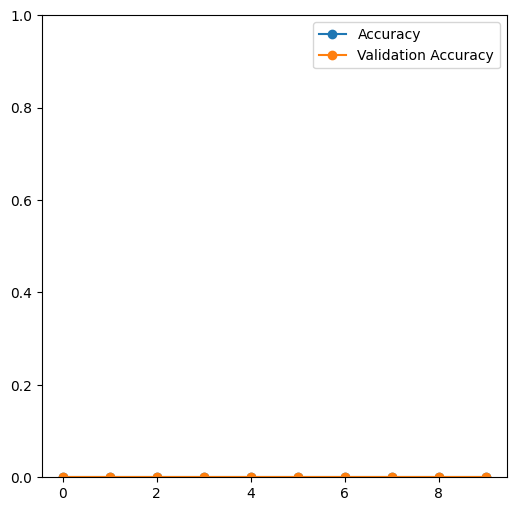

In [18]:
accuracy_fig = plt.figure(figsize=(6,6))
ax = accuracy_fig.add_subplot()
ax.plot(history.history["accuracy"], label="Accuracy", marker='o')
ax.plot(history.history["val_accuracy"], label="Validation Accuracy", marker='o')
ax.legend()
ax.set_ylim(0, 1)
accuracy_fig.show()